In [9]:
# Load libraries
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [11]:
# Load dataset
linkname = "https://raw.githubusercontent.com/GerhardTrippen/DataSets/master/churn.txt"
dataset = read_csv(linkname)
# Make sure that the linkname assignment is in ONE
# SINGLE line!
# Without any spaces in the link!

In [12]:
# shape
print(dataset.shape)
# head
print(dataset.head(10))
# descriptions
print(dataset.describe())
# class distribution
print(dataset.groupby('Churn?').size())

(3333, 21)
  State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   
5    AL             118        510  391-8027        yes         no   
6    MA             121        510  355-9993         no        yes   
7    MO             147        415  329-9001        yes         no   
8    LA             117        408  335-4719         no         no   
9    WV             141        415  330-8173        yes        yes   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...  

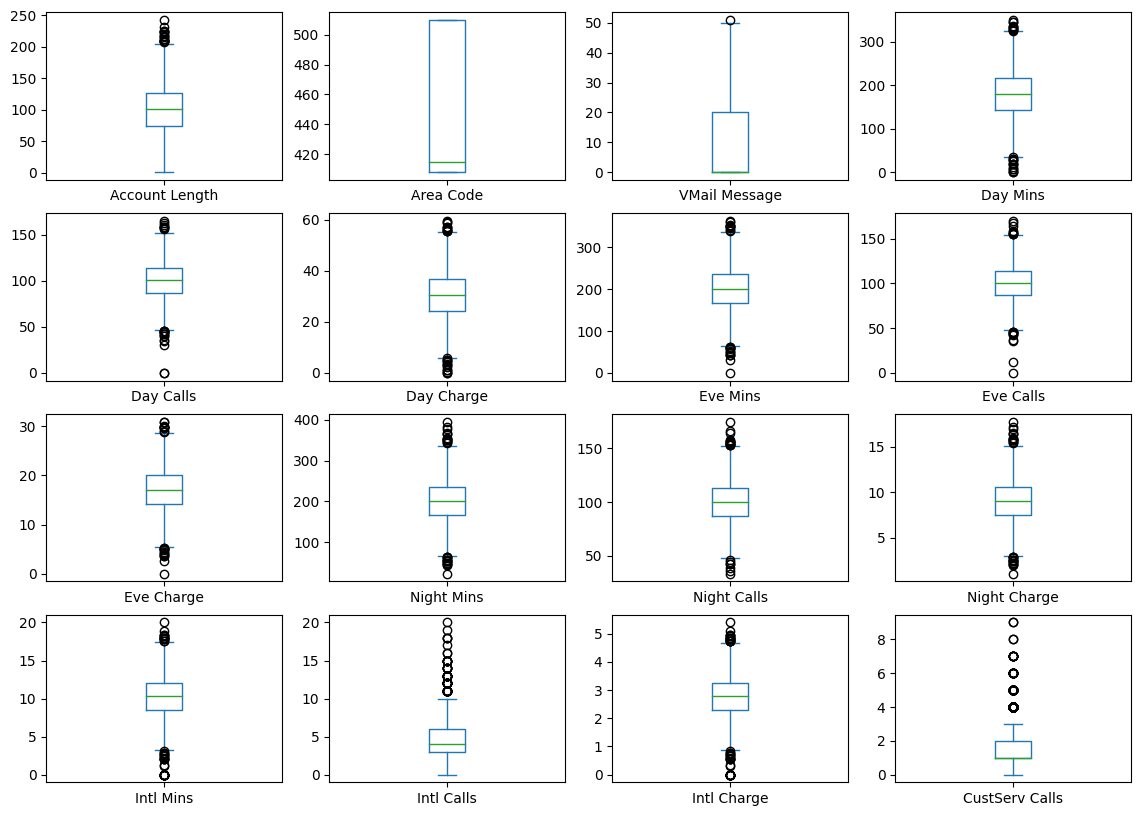

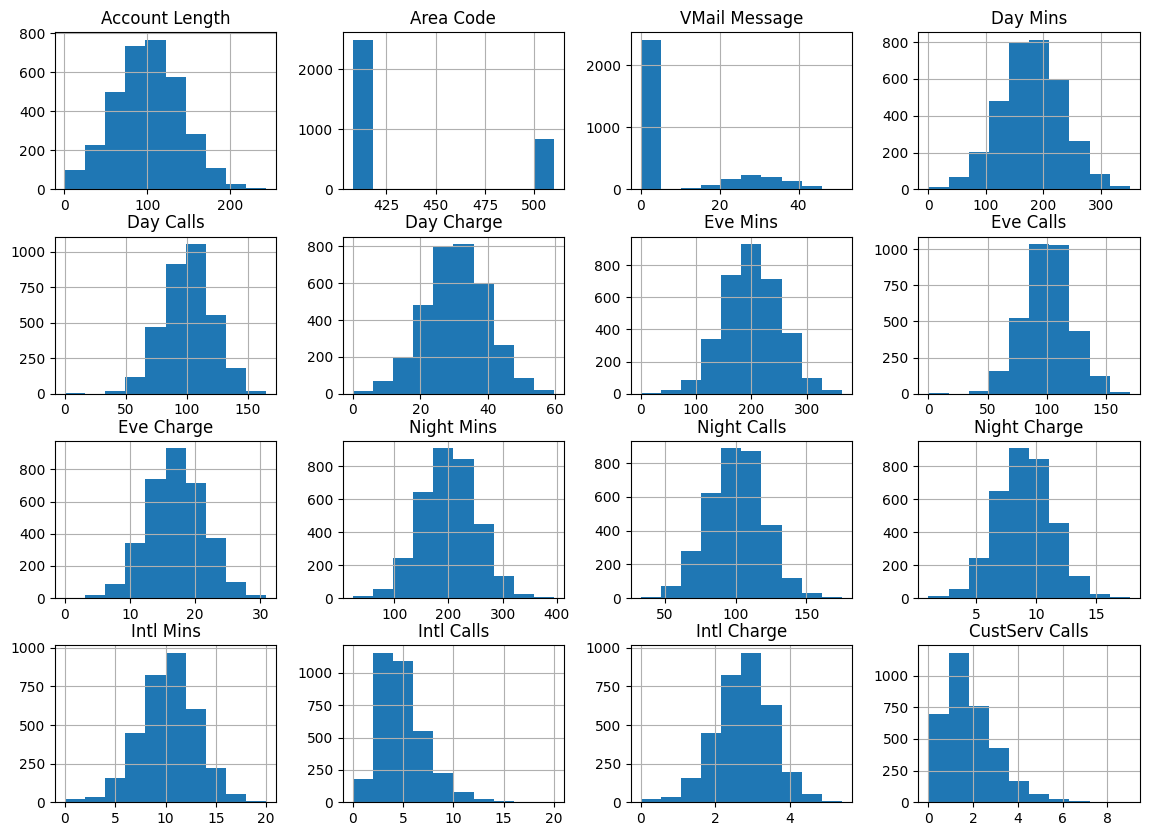

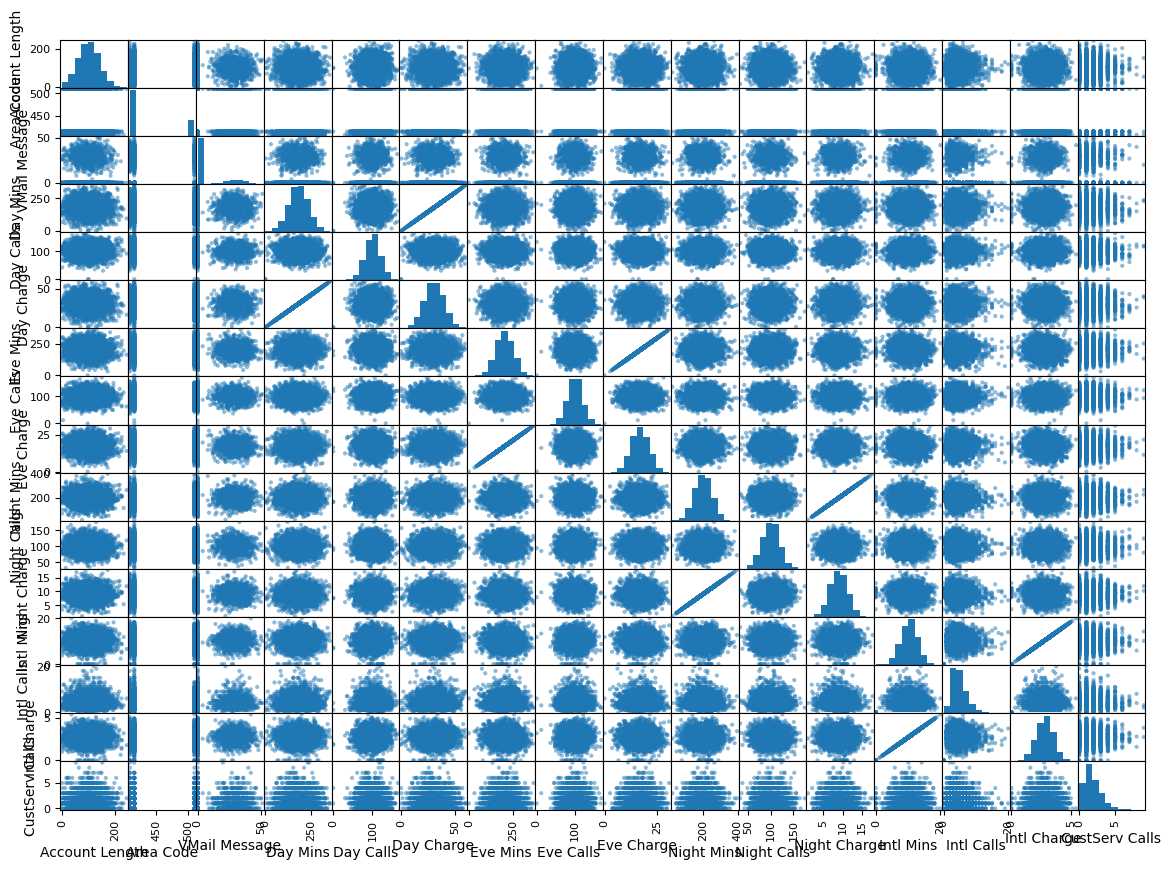

In [13]:
# some minimal Exploratory Data Analysis (EDA)
# box and whisker plots
dataset.plot(figsize=(14,10), kind='box', subplots=True, 
layout=(4,4), sharex=False, sharey=False)
plt.show()
# histograms
dataset.hist(figsize=(14,10))
plt.show()
# scatter plot matrix
scatter_matrix(dataset, figsize=(14,10))
plt.show()

In [14]:
# Why were there only 16 plots of each type
# if there are 20 predictors?
# show data set info
dataset.info()
# should be done earlier!
# transform "Int'l Plan" and "VMail Plan" 
# into numerical values 0/1.
dataset["Int'l Plan"] = dataset["Int'l Plan"]. map({'yes': 1, 'no': 0})
dataset["VMail Plan"] = dataset["VMail Plan"]. map({'yes': 1, 'no': 0})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [15]:
# drop columns "State" and "Phone" (number)
dataset.drop(columns=["State", "Phone"], inplace=True)
# this is new in pandas version 0.21.0.
# Using older pandas versions you can write instead:
# dataset.drop(["State", "Phone"], axis=1, inplace=True)
# show data head
dataset.head(10)

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [17]:
# separate features from target
# get values of dataframe
array = dataset.values
print(array)
# features = predictor/independent/explanatory variables
X = array[:,0:18]
print(X)
# target variable = dependent/response variable
y = array[:,18]
print(y)

[[128 415 0 ... 2.7 1 'False.']
 [107 415 0 ... 3.7 1 'False.']
 [137 415 0 ... 3.29 0 'False.']
 ...
 [28 510 0 ... 3.81 2 'False.']
 [184 510 1 ... 1.35 2 'False.']
 [74 415 0 ... 3.7 0 'False.']]
[[128 415 0 ... 3 2.7 1]
 [107 415 0 ... 3 3.7 1]
 [137 415 0 ... 5 3.29 0]
 ...
 [28 510 0 ... 6 3.81 2]
 [184 510 1 ... 10 1.35 2]
 [74 415 0 ... 4 3.7 0]]
['False.' 'False.' 'False.' ... 'False.' 'False.' 'False.']


In [18]:
# Split off test dataset
# 1/5 of the data will be used for testing
test_size = 0.20
seed = 7
# select 1/5 randomly and split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=test_size, random_state=seed)
print(X_train)
print(y_train)
print(X_test)
print(y_test)
# If necessary, function could be called with stratify=y 
# to ensures that training/testing set have equally 
# balanced(stratified) classes as given in y.

[[148 510 0 ... 9 3.94 1]
 [87 510 0 ... 3 3.62 1]
 [139 510 1 ... 6 3.62 1]
 ...
 [190 415 0 ... 3 2.3 0]
 [180 510 0 ... 5 4.24 2]
 [94 415 0 ... 7 3.0 2]]
['False.' 'False.' 'True.' ... 'False.' 'False.' 'False.']
[[104 408 0 ... 5 2.65 1]
 [122 415 0 ... 8 3.7 2]
 [145 415 0 ... 2 0.3 2]
 ...
 [98 415 1 ... 7 2.92 1]
 [100 415 1 ... 2 3.13 2]
 [49 415 0 ... 7 4.21 0]]
['False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'True.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'True.' 'False.'
 'False.' 'False.' 'False.' 'True.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'True.' 'False.' 'True.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'True.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'True.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'F

In [22]:
# Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [23]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.863113 (0.023049)
LDA: 0.852986 (0.022265)
KNN: 0.876247 (0.023091)
CART: 0.910740 (0.010872)
NB: 0.866475 (0.012920)
SVM: 0.856733 (0.022421)


[array([0.82771536, 0.86142322, 0.86142322, 0.87640449, 0.81273408,
       0.88014981, 0.88721805, 0.87593985, 0.86842105, 0.87969925]), array([0.83146067, 0.85018727, 0.8576779 , 0.8576779 , 0.79775281,
       0.86142322, 0.86842105, 0.85714286, 0.88345865, 0.86466165]), array([0.84269663, 0.8576779 , 0.86516854, 0.87265918, 0.84269663,
       0.90262172, 0.90601504, 0.89473684, 0.87593985, 0.90225564]), array([0.91385768, 0.8988764 , 0.90636704, 0.90262172, 0.917603  ,
       0.89138577, 0.91353383, 0.92481203, 0.92857143, 0.90977444]), array([0.88014981, 0.86516854, 0.86516854, 0.86516854, 0.83520599,
       0.86516854, 0.87218045, 0.86090226, 0.88721805, 0.86842105]), array([0.83146067, 0.86142322, 0.85018727, 0.87265918, 0.80524345,
       0.86891386, 0.87969925, 0.86090226, 0.85338346, 0.88345865])]


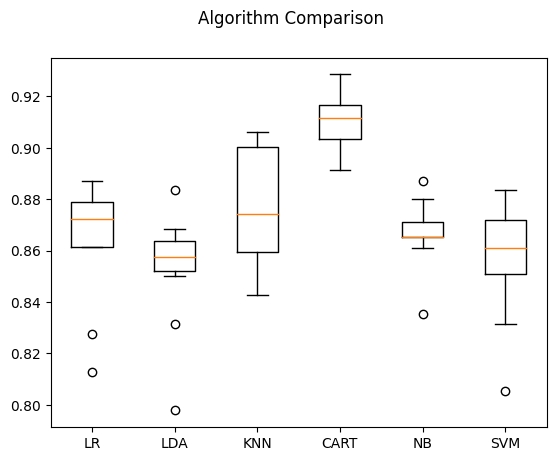

In [24]:
# Compare Algorithms
print(results)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [25]:
# Make predictions on test dataset
# instantiate learning model
cart = DecisionTreeClassifier()
# fitting the model
cart.fit(X_train, y_train)
# predict the response
predictions = cart.predict(X_test)
print(predictions)

['False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'True.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'True.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'True.' 'False.' 'True.' 'False.' 'False.' 'False.'
 'False.' 'True.' 'True.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'True.' 'False.'
 'False.' 'False.' 'False.' 'True.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'True.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'True.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'True.' 'True.' 'False.' 'True.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'True.' 'True.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'F

In [26]:
print(y_test)
# evaluate accuracy
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

['False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'True.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'True.' 'False.'
 'False.' 'False.' 'False.' 'True.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'True.' 'False.' 'True.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'True.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'True.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'True.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'False.' 'True.' 'False.' 'False.'
 'False.' 'False.' 'True.' 'False.' 'True.' 'False.' 'True.' 'True.'
 'False.' 'False.' 'False.' 'False.' 'True.' 'True.' 'False.' 'False.'
 'False.' 'False.' 'False.' 'False.' 'True.' 'False.' 'False.' 'Fa